# Random Walk visualisation

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

In [266]:
# Construct 5comm adjacency matrix
adjmat = np.zeros((29,29))

for i in range(23,28):
    adjmat[i,28] = 1
    adjmat[28,i] = 1

for i in range(19,23):
    adjmat[i,18] = 1
    adjmat[18,i] = 1

for i in range(12,18):
    adjmat[i,11] = 1
    adjmat[11,i] = 1

adjmat[11,5] = 1
adjmat[5,11] = 1
adjmat[17,18] = 1
adjmat[18,17] = 1
adjmat[28,17] = 1
adjmat[17,28] = 1

for i in range(1,6):
    adjmat[0,i] = 1
    adjmat[i,0] = 1

for i in range(5,11):
    adjmat[6,i] = 1
    adjmat[i,6] = 1

adjmat[6,6] = 0

# print(adjmat)

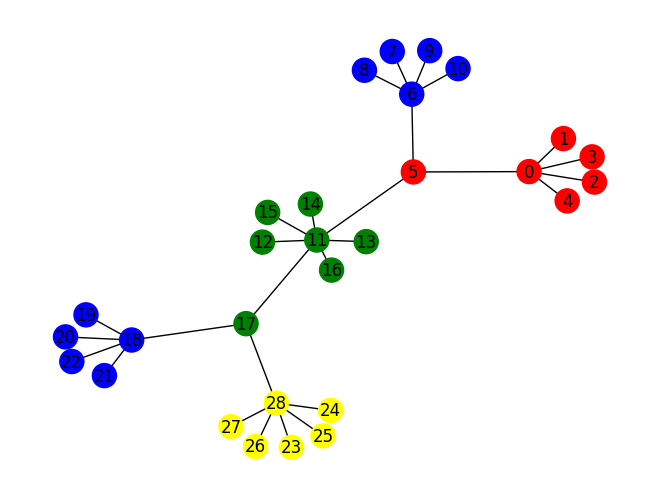

In [267]:
# convert to networkx graph
G = nx.from_numpy_array(adjmat)

# assign ground truth labels
labels = {}
for i in range(29):
    if i < 6:
        labels[i] = 0
    elif (i >= 6 and i <= 10) or (i >= 18 and i <= 22):
        labels[i] = 1
    elif (i >= 11 and i <= 17):
        labels[i] = 2
    elif (i >= 23 and i <= 28):
        labels[i] = 3

# colour nodes according to ground truth labels
node_color = []
for i in range(29):
    if labels[i] == 0:
        node_color.append('red')
    elif labels[i] == 1:
        node_color.append('blue')
    elif labels[i] == 2:
        node_color.append('green')
    elif labels[i] == 3:
        node_color.append('yellow')

# draw graph
pos = nx.spring_layout(G, seed=4)
nx.draw(G,pos, node_color=node_color, with_labels=True)

In [268]:
def update_node_colors(G, current_node, visited_nodes, step):
    node_colors = []
    for node in G.nodes():
        if node == current_node:
            node_colors.append('red')  # Current node is red
        elif node in visited_nodes:
            alpha = 0.5  # Alpha value for previously visited nodes
            node_colors.append((1, 0, 0, alpha))  # Lighter red for visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes are gray

    # Plot the graph with updated node colors
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, with_labels=True)
    plt.title(f"Step {step} - Current Node: {current_node}")
    plt.savefig(f"step_{step}.png")  # Save the plot as an image
    plt.close()

def second_order_random_walk(G, p, q, num_steps):
    current_node = random.choice(list(G.nodes()))
    visited_nodes = set()
    
    for step in range(num_steps):
        update_node_colors(G, current_node, visited_nodes, step)
        
        neighbors = list(G.neighbors(current_node))
        weights = [1.0] * len(neighbors)
        
        if len(visited_nodes) >= 2:
            prev_node = list(visited_nodes)[-2]
            prev_neighbors = list(G.neighbors(prev_node))
            
            for i, neighbor in enumerate(neighbors):
                if neighbor == prev_node:
                    weights[i] *= 1 / p
                elif neighbor in prev_neighbors:
                    weights[i] *= 1 / q
                else:
                    weights[i] = 1.0
        
        next_node = random.choices(neighbors, weights=weights)[0]
        visited_nodes.add(current_node)
        current_node = next_node

    # Generate the last image after completing the random walk
    update_node_colors(G, current_node, visited_nodes, num_steps)

In [269]:
second_order_random_walk(G, 10, 0.5, 20)